<a href="https://colab.research.google.com/github/mizscrystal/SVM/blob/main/SVM_With_Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import MiniBatchKMeans

In [ ]:
features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'intrusion_type']

In [ ]:
from google.colab import files
dataset = files.upload()

Saving kddcup.data_10_percent_corrected.gz to kddcup.data_10_percent_corrected (1).gz


In [ ]:
data = pd.read_csv('kddcup.data_10_percent_corrected.gz', names=features, header=None)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [ ]:
print('The no of data points are:',data.shape[0])
print('='*40)
print('The no of features are:',data.shape[1])
print('='*40)
print('Some of the features are:',features[:10])

The no of data points are: 311029
The no of features are: 42
Some of the features are: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot']


In [ ]:
output = data['intrusion_type'].values
labels = set(output)

In [ ]:
print('The different type of output labels are:',labels)
print('='*100)
print('No. of different output labels are:', len(labels))

The different type of output labels are: {'xlock.', 'xsnoop.', 'loadmodule.', 'apache2.', 'land.', 'processtable.', 'mailbomb.', 'snmpgetattack.', 'satan.', 'multihop.', 'perl.', 'guess_passwd.', 'buffer_overflow.', 'xterm.', 'imap.', 'ps.', 'mscan.', 'udpstorm.', 'smurf.', 'snmpguess.', 'normal.', 'sqlattack.', 'portsweep.', 'neptune.', 'sendmail.', 'saint.', 'pod.', 'nmap.', 'phf.', 'httptunnel.', 'back.', 'teardrop.', 'named.', 'warezmaster.', 'ipsweep.', 'ftp_write.', 'rootkit.', 'worm.'}
No. of different output labels are: 38



*Data Cleaning:-*

Checking for NULL values:-


In [ ]:
print('Null values in the dataset are: ',len(data[data.isnull().any(1)]))

Null values in the dataset are:  0


Checking for DUPLICATE values:-

In [ ]:
duplicateRowsDF = data[data.duplicated()]
duplicateRowsDF.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
8,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
10,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
18,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [ ]:
data.drop_duplicates(subset=features, keep='first', inplace=True)
data.shape

(77291, 42)

In [ ]:
data.to_pickle('data.pkl')
data = pd.read_pickle('data.pkl')


Exploratory Data Analysis:-
Distribution of categories in class label:-


In [ ]:
print('Label distribution dataset, intrusion_type:')
print(data['intrusion_type'].value_counts())

Label distribution dataset, intrusion_type:
normal.             47913
neptune.            20332
guess_passwd.        1302
mscan.               1049
warezmaster.         1002
smurf.                936
satan.                860
apache2.              794
processtable.         744
back.                 386
saint.                364
snmpguess.            359
mailbomb.             308
snmpgetattack.        179
portsweep.            174
ipsweep.              155
httptunnel.           145
nmap.                  80
pod.                   45
buffer_overflow.       22
multihop.              18
named.                 17
ps.                    16
sendmail.              15
rootkit.               13
xterm.                 13
teardrop.              12
xlock.                  9
land.                   9
xsnoop.                 4
ftp_write.              3
loadmodule.             2
perl.                   2
udpstorm.               2
worm.                   2
phf.                    2
sqlattack.          

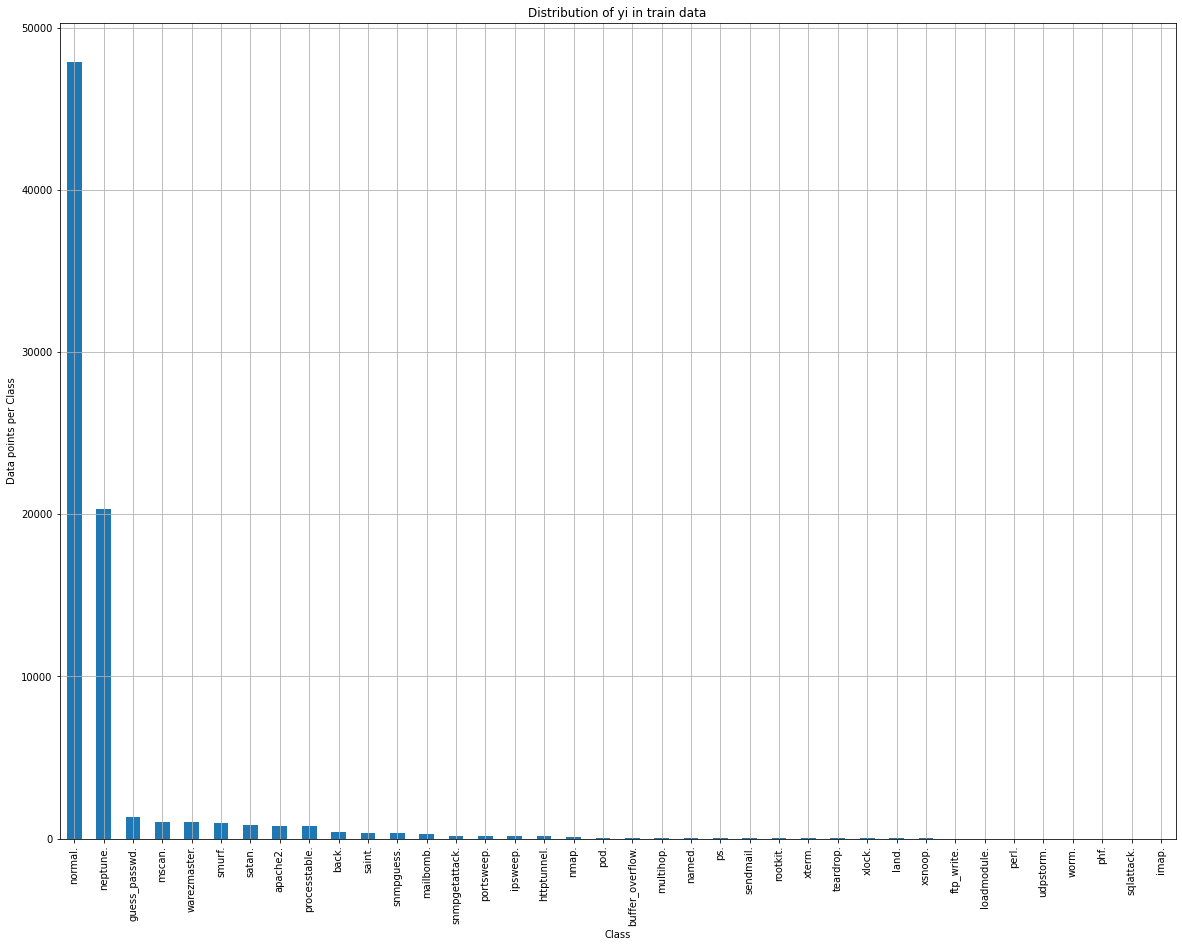

Number of data points in class 1 : 47913 ( 61.99 %)
Number of data points in class 2 : 20332 ( 26.306 %)
Number of data points in class 3 : 1302 ( 1.685 %)
Number of data points in class 4 : 1049 ( 1.357 %)
Number of data points in class 5 : 1002 ( 1.296 %)
Number of data points in class 6 : 936 ( 1.211 %)
Number of data points in class 7 : 860 ( 1.113 %)
Number of data points in class 8 : 794 ( 1.027 %)
Number of data points in class 9 : 744 ( 0.963 %)
Number of data points in class 10 : 386 ( 0.499 %)
Number of data points in class 11 : 364 ( 0.471 %)
Number of data points in class 12 : 359 ( 0.464 %)
Number of data points in class 13 : 308 ( 0.398 %)
Number of data points in class 14 : 179 ( 0.232 %)
Number of data points in class 15 : 174 ( 0.225 %)
Number of data points in class 16 : 155 ( 0.201 %)
Number of data points in class 17 : 145 ( 0.188 %)
Number of data points in class 18 : 80 ( 0.104 %)
Number of data points in class 19 : 45 ( 0.058 %)
Number of data points in class 20 

In [ ]:
plt.figure(figsize=(20,15))
class_distribution = data['intrusion_type'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()


sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',class_distribution.values[i], '(', np.round((class_distribution.values[i]/data.shape[0]*100), 3), '%)')

    


Performance metrics for the problem:-

    As the dataset is highly imbalanced, we will need to build a model which should be able to classify the INTRUSION categories accurately.

    We will use the CONFUSION MATRIX as that will help us to determine how well the data points belonging to each of the 23 classes are classified.

    Along with the confusion matrix, we will also calculate precision, recall and weighted f1-score to determine the best model.

    Although not preferred for imbalanced datasets, but we will also display the accuracy score that will give us an estimate of the total no. of correctly classified points.

    Some important evaluation scores that can be added for this problem are the TPR (True Positive rate) and FPR (False Positive Rate) scores.

For this problem, we want our FPR to be as low as possible. This is because, a "Normal" connection getting dropped beacuse of getting misclassified as a "Bad" connection is less severe compared to a "Bad" connection getting misclassified as a "Normal" connection, which may result in a security threat



(I) MultiClass Classification Problem :-
Univariate Analysis:-
1. Duration:-


In [ ]:
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text major ticklabel objects>)

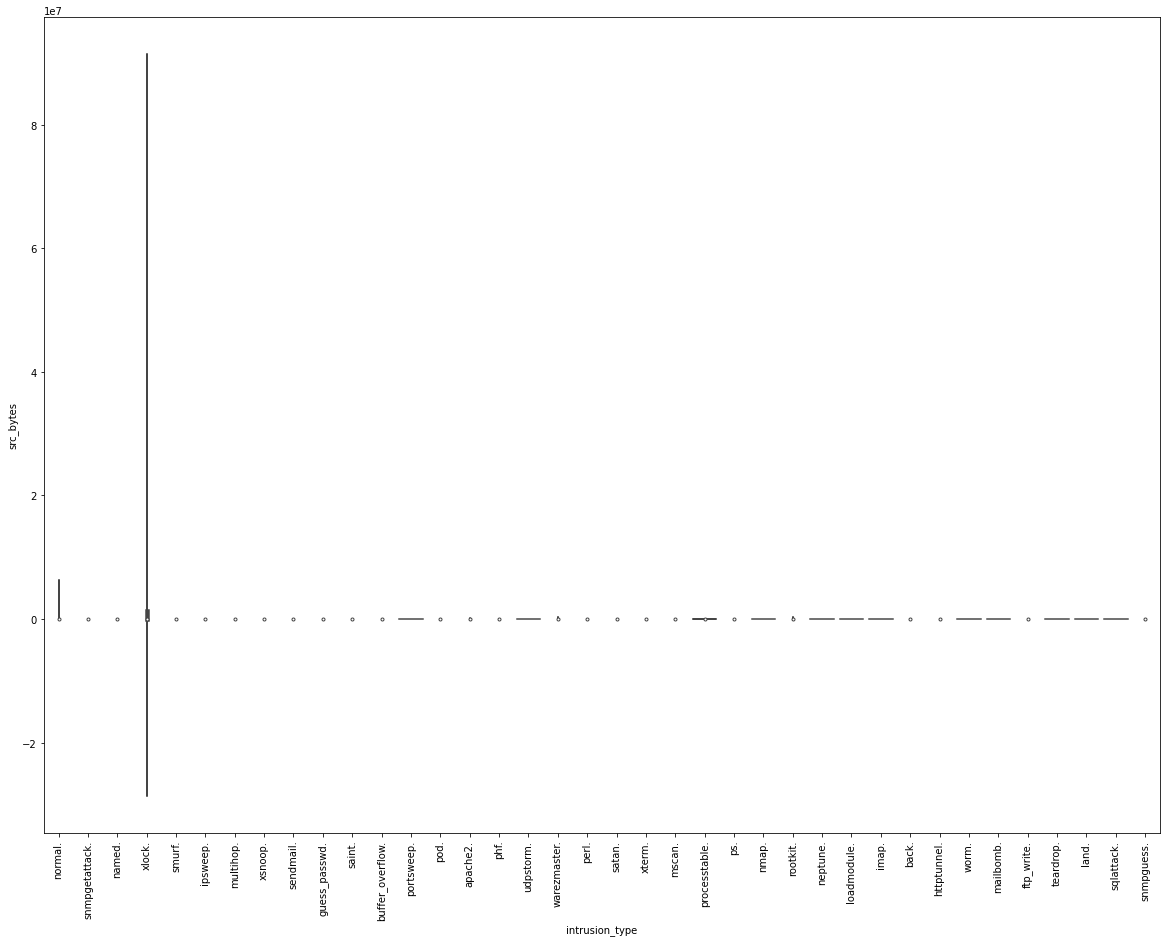

In [ ]:
plt.figure(figsize=(20,15))
sns.violinplot(x="intrusion_type", y="src_bytes", data=data)
plt.xticks(rotation=90)

Feature Selection using genetic algorithm

Train Test Split:- 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('intrusion_type', axis=1), data['intrusion_type'], test_size=0.30)

In [ ]:
print('Train data')
print(X_train.shape)
print(Y_train.shape)
print('='*20)
print('Test data')
print(X_test.shape)
print(Y_test.shape)

Train data
(54103, 41)
(54103,)
Test data
(23188, 41)
(23188,)



Vectorizing Categorical features using one-hot encoding:-

Categorical features in our dataset are:- 'protocol_type', 'service', and 'flag'.


Protocol_type:- 

In [ ]:
protocol = list(X_train['protocol_type'].values)
protocol = list(set(protocol))
print('Protocol types are:', protocol)

Protocol types are: ['tcp', 'udp', 'icmp']


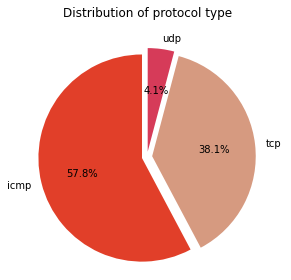

In [ ]:
#Drawing a pie chart to classify protocols of connections
colors = ["#E13F29", "#D69A80", "#D63B59"]
labels = ['icmp', 'tcp', 'udp']
sizes = [282342,186237,20156]
explode = (0.05, 0.05, 0.05)  

plt.pie(sizes, explode =explode ,labels=labels, autopct='%1.1f%%',colors=colors,shadow=False, startangle=90)
plt.axis('equal')
plt.title('Distribution of protocol type\n')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(4,4)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(vocabulary=protocol, binary=True)
train_protocol = one_hot.fit_transform(X_train['protocol_type'].values)
test_protocol = one_hot.transform(X_test['protocol_type'].values)

In [ ]:
print(train_protocol[1].toarray())
train_protocol.shape

[[1 0 0]]


(54103, 3)

Service:- 

In [ ]:
service = list(X_train['service'].values)
service = list(set(service))
print('Service types are:\n', service)

Service types are:
 ['netstat', 'iso_tsap', 'pop_3', 'netbios_dgm', 'imap4', 'urp_i', 'echo', 'bgp', 'finger', 'netbios_ssn', 'vmnet', 'nntp', 'efs', 'tim_i', 'domain', 'telnet', 'netbios_ns', 'ftp_data', 'private', 'Z39_50', 'uucp', 'X11', 'ldap', 'uucp_path', 'ecr_i', 'shell', 'printer', 'supdup', 'courier', 'link', 'icmp', 'login', 'discard', 'smtp', 'pm_dump', 'ftp', 'gopher', 'other', 'tftp_u', 'klogin', 'ctf', 'http_443', 'kshell', 'http', 'ntp_u', 'mtp', 'pop_2', 'sql_net', 'csnet_ns', 'ssh', 'whois', 'domain_u', 'auth', 'exec', 'remote_job', 'daytime', 'eco_i', 'time', 'hostnames', 'IRC', 'systat', 'nnsp', 'name', 'sunrpc', 'rje']


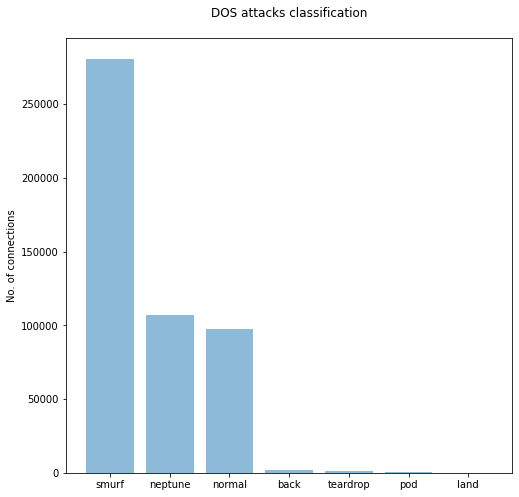

In [ ]:
#Drawing a bar graph to classify DOS attacks in connections
objects = ('smurf', 'neptune', 'normal', 'back', 'teardrop', 'pod', 'land')
y_pos = np.arange(len(objects))
performance = [280790,107201,97277,2203,979,264,21]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('No. of connections')
plt.title('DOS attacks classification\n')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(vocabulary=service, binary=True)
train_service = one_hot.fit_transform(X_train['service'].values)
test_service = one_hot.transform(X_test['service'].values)

In [ ]:
print(train_service[100].toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
train_service.shape

(54103, 65)

Flag:- 

In [ ]:
flag = list(X_train['flag'].values)
flag = list(set(flag))
print('flag types are:', flag)

flag types are: ['RSTR', 'SH', 'RSTO', 'S0', 'S3', 'S1', 'REJ', 'OTH', 'RSTOS0', 'S2', 'SF']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(binary=True)
one_hot.fit(X_train['flag'].values)
train_flag = one_hot.transform(X_train['flag'].values)
test_flag = one_hot.transform(X_test['flag'].values)

In [ ]:
print(test_flag[3000].toarray())
train_flag.shape

[[0 0 0 0 0 0 0 0 0 1 0]]


(54103, 11)

In [ ]:
X_train.drop(['protocol_type','service','flag'], axis=1, inplace=True)
X_test.drop(['protocol_type','service','flag'], axis=1, inplace=True)

Applying Standardisation on the continuous features of our dataset:- 

In [ ]:
def feature_scaling(X_train, X_test, feature_name):
    
    '''
    This function performs standardisation on the features
    '''
    
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaler1 = scaler.fit_transform(X_train[feature_name].values.reshape(-1,1))
    scaler2 = scaler.transform(X_test[feature_name].values.reshape(-1,1))
    
    return scaler1, scaler2

Duration:- 

In [ ]:
duration1, duration2 = feature_scaling(X_train, X_test, 'duration')
src_bytes1, src_bytes2 = feature_scaling(X_train, X_test, 'src_bytes')
dst_bytes1, dst_bytes2 = feature_scaling(X_train, X_test, 'dst_bytes')
land1, land2 = np.array([X_train['land'].values]), np.array([X_test['land'].values])
num_failed_logins1, num_failed_logins2 = feature_scaling(X_train, X_test, 'num_failed_logins')
num_failed_logins1, num_failed_logins2 = feature_scaling(X_train, X_test, 'num_failed_logins')
num_compromised1, num_compromised2 = feature_scaling(X_train, X_test, 'num_compromised')
su_attempted1, su_attempted2 = feature_scaling(X_train, X_test, 'su_attempted')
num_shells1, num_shells2 = feature_scaling(X_train, X_test, 'num_shells')
is_host_login1, is_host_login2 = np.array([X_train['is_host_login'].values]), np.array([X_test['is_host_login'].values])
srv_count1, srv_count2 = feature_scaling(X_train, X_test, 'srv_count')
srv_rerror_rate1, srv_rerror_rate2 = feature_scaling(X_train, X_test, 'srv_rerror_rate')
srv_serror_rate1, srv_serror_rate2 = feature_scaling(X_train, X_test, 'srv_serror_rate')
rerror_rate1, rerror_rate2 = feature_scaling(X_train, X_test, 'rerror_rate')
same_srv_rate1, same_srv_rate2 = feature_scaling(X_train, X_test, 'same_srv_rate')
diff_srv_rate1, diff_srv_rate2 = feature_scaling(X_train, X_test, 'diff_srv_rate')
srv_diff_host_rate1, srv_diff_host_rate2 = feature_scaling(X_train, X_test, 'srv_diff_host_rate')
dst_host_same_srv_rate1, dst_host_same_srv_rate2= feature_scaling(X_train, X_test, 'dst_host_same_srv_rate')
dst_host_diff_srv_rate1, dst_host_diff_srv_rate2 = feature_scaling(X_train, X_test, 'dst_host_diff_srv_rate')

In [ ]:
wrong_fragment1, wrong_fragment2 = feature_scaling(X_train, X_test, 'wrong_fragment')
urgent1, urgent2 = feature_scaling(X_train, X_test, 'urgent')
hot1, hot2 = feature_scaling(X_train, X_test, 'hot')
root_shell1, root_shell2 = feature_scaling(X_train, X_test, 'root_shell')
num_root1, num_root2 = feature_scaling(X_train, X_test, 'num_root')
num_file_creations1, num_file_creations2 = feature_scaling(X_train, X_test, 'num_file_creations')
num_access_files1, num_access_files2 = feature_scaling(X_train, X_test, 'num_access_files')
data['num_outbound_cmds'].value_counts() #- We will not use 'num_outbound_cmds' feature as it has all zero values.
serror_rate1, serror_rate2 = feature_scaling(X_train, X_test, 'serror_rate')
dst_host_count1, dst_host_count2 = feature_scaling(X_train, X_test, 'dst_host_count')
dst_host_srv_count1, dst_host_srv_count2 = feature_scaling(X_train, X_test, 'dst_host_srv_count')
dst_host_same_src_port_rate1, dst_host_same_src_port_rate2 = feature_scaling(X_train, X_test, 'dst_host_same_src_port_rate')
dst_host_srv_diff_host_rate1, dst_host_srv_diff_host_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_diff_host_rate')
dst_host_serror_rate1, dst_host_serror_rate2 = feature_scaling(X_train, X_test, 'dst_host_serror_rate')
dst_host_srv_serror_rate1, dst_host_srv_serror_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_serror_rate')
dst_host_rerror_rate1, dst_host_rerror_rate2 = feature_scaling(X_train, X_test, 'dst_host_rerror_rate')
dst_host_srv_rerror_rate1, dst_host_srv_rerror_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_rerror_rate')
is_guest_login1, is_guest_login2 = np.array([X_train['is_guest_login'].values]), np.array([X_test['is_guest_login'].values])
logged_in1, logged_in2 = np.array([X_train['logged_in'].values]), np.array([X_test['logged_in'].values])
count1, count2 = feature_scaling(X_train, X_test, 'count')
dst_host_diff_srv_rate1, dst_host_diff_srv_rate2 = feature_scaling(X_train, X_test, 'dst_host_diff_srv_rate')

In [ ]:
print(duration1[1])
print(src_bytes1[1])
print(dst_bytes1[1])
print(wrong_fragment1[1])
print(urgent1[1])
print(hot1[1])
print(num_failed_logins1[1])
num_compromised1[1]
root_shell1[1]
su_attempted1[1]
num_root1[1]
num_file_creations1[1]
num_shells1[1]
num_access_files1[1]
srv_count1[1]
serror_rate1[1]
srv_serror_rate1[1]
rerror_rate1[1]
srv_rerror_rate1[1]
same_srv_rate1[1]
diff_srv_rate1[1]
srv_diff_host_rate1[1]
dst_host_count1[1]
dst_host_srv_count1[1]
dst_host_same_srv_rate1[1]
dst_host_diff_srv_rate1[1]
dst_host_same_src_port_rate1[1]
dst_host_srv_diff_host_rate1[1]
dst_host_serror_rate1[1]
dst_host_srv_serror_rate1[1]
dst_host_rerror_rate1[1]
dst_host_srv_rerror_rate1[1]
num_failed_logins1[1]
land1.shape
is_host_login1.shape
is_guest_login1.shape
logged_in1.shape
count1[1]
dst_host_diff_srv_rate1[1]

[-0.08830648]
[-0.01237312]
[-0.09933097]
[-0.032601]
[-0.01032038]
[-0.06409598]
[-0.07907331]


array([0.76551864])

In [ ]:
#Merging categorical and continuous features:-

from scipy.sparse import hstack

In [ ]:
X_train_1 = hstack((duration1, train_protocol, train_service, train_flag, src_bytes1,
       dst_bytes1, num_failed_logins1, num_compromised1,
       su_attempted1, is_host_login1.T, srv_count1, serror_rate1,
       srv_serror_rate1, rerror_rate1, srv_rerror_rate1, same_srv_rate1,
       diff_srv_rate1, srv_diff_host_rate1, dst_host_count1,
       dst_host_srv_count1, dst_host_same_srv_rate1,
       dst_host_diff_srv_rate1, dst_host_same_src_port_rate1,
       dst_host_srv_diff_host_rate1, dst_host_serror_rate1,
       dst_host_srv_serror_rate1, dst_host_rerror_rate1,
       dst_host_srv_rerror_rate1))

In [ ]:
X_train_1.shape

(54103, 104)

In [ ]:
X_test_1 = hstack((duration2, test_protocol, test_service, test_flag, src_bytes2,
       dst_bytes2, num_failed_logins2, num_compromised2,
       su_attempted2, is_host_login2.T, srv_count2, serror_rate2,
       srv_serror_rate2, rerror_rate2, srv_rerror_rate2, same_srv_rate2,
       diff_srv_rate2, srv_diff_host_rate2, dst_host_count2,
       dst_host_srv_count2, dst_host_same_srv_rate2,
       dst_host_diff_srv_rate2, dst_host_same_src_port_rate2,
       dst_host_srv_diff_host_rate2, dst_host_serror_rate2,
       dst_host_srv_serror_rate2, dst_host_rerror_rate2,
       dst_host_srv_rerror_rate2))

In [ ]:
X_test_1.shape

(23188, 104)

In [ ]:
import joblib
joblib.dump(X_train_1,'X_train_1.pkl')
joblib.dump(X_test_1,'X_test_1.pkl')
X_train_1 = joblib.load('X_train_1.pkl')
X_test_1 = joblib.load('X_test_1.pkl')

In [ ]:
joblib.dump(Y_train,'Y_train.pkl')
joblib.dump(Y_test,'Y_test.pkl')
Y_train = joblib.load('Y_train.pkl')
Y_test = joblib.load('Y_test.pkl')

In [ ]:
#Utility Functions:-
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [ ]:
def confusion_matrix_func(Y_test, y_test_pred):
    '''
    This function plots the confusion matrix heatmap using the actual and predicted values.
    '''
    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmaster', 'rootkit', 
              'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf',
              'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    
    plt.show()

In [ ]:
def model(model_name, X_train, Y_train, X_test, Y_test):
    
    '''
    This function computes the performance scores on the train and test data.
    '''
    
    print('Fitting the model and prediction on train data:')
    start = dt.datetime.now()
    model_name.fit(X_train, Y_train)
    y_tr_pred = model_name.predict(X_train)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    
    results_tr = dict()
    y_tr_pred = model_name.predict(X_train)    
    results_tr['precision'] = precision_score(Y_train, y_tr_pred, average='weighted')
    results_tr['recall'] = recall_score(Y_train, y_tr_pred, average='weighted')
    results_tr['f1_score'] = f1_score(Y_train, y_tr_pred, average='weighted')
    
    results_test = dict()
    print('Prediction on test data:')
    start = dt.datetime.now()
    y_test_pred = model_name.predict(X_test)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    
    print('Performance metrics:')
    print('='*50)
    print('Confusion Matrix is:')
    confusion_matrix_func(Y_test, y_test_pred)
    print('='*50)
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(precision_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(recall_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(f1_score(Y_test, y_test_pred, average='weighted'))
    # add the trained  model to the results
    results_test['model'] = model
    
    return results_tr, results_test

In [ ]:
def print_grid_search_attributes(model):
    
    '''
    This function prints all the grid search attributes
    '''
    
    print('---------------------------')
    print('|      Best Estimator     |')
    print('---------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('---------------------------')
    print('|     Best parameters     |')
    print('---------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('----------------------------------')
    print('|   No of CrossValidation sets   |')
    print('----------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('---------------------------')
    print('|        Best Score       |')
    print('---------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

In [ ]:
def tpr_fpr_func(Y_tr, Y_pred):
    '''
    This function computes the TPR and FPR scores using the actual and predicetd values
    '''
    results = dict()
    Y_tr = Y_tr.to_list()
    tp = 0; fp = 0; positives = 0; negatives = 0; length = len(Y_tr)
    for i in range(len(Y_tr)):
        if Y_tr[i]=='normal.':
            positives += 1
        else:
            negatives += 1
            
    for i in range(len(Y_pred)):
        if Y_tr[i]=='normal.' and Y_pred[i]=='normal.':
            tp += 1
        elif Y_tr[i]!='normal.' and Y_pred[i]=='normal.':
            fp += 1
            
    tpr = tp/positives
    fpr = fp/negatives
    
    results['tp'] = tp; results['tpr'] = tpr; results['fp'] = fp; results['fpr'] = fpr
    
    return results

In [ ]:
#Model_3 :- SVM (SGD_Classifier with loss='hinge')

hyperparameter = {'alpha':[10**x for x in range(-8,3)], 'penalty':['l1', 'l2']}

from sklearn.linear_model import SGDClassifier
svm = SGDClassifier(loss='hinge')
svm_grid = GridSearchCV(svm, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)



Fitting the model and prediction on train data:
Fitting 5 folds for each of 22 candidates, totalling 110 fits
Completed
Time taken: 0:18:22.371892
Prediction on test data:
Completed
Time taken: 0:00:00.028008
Performance metrics:
Confusion Matrix is:


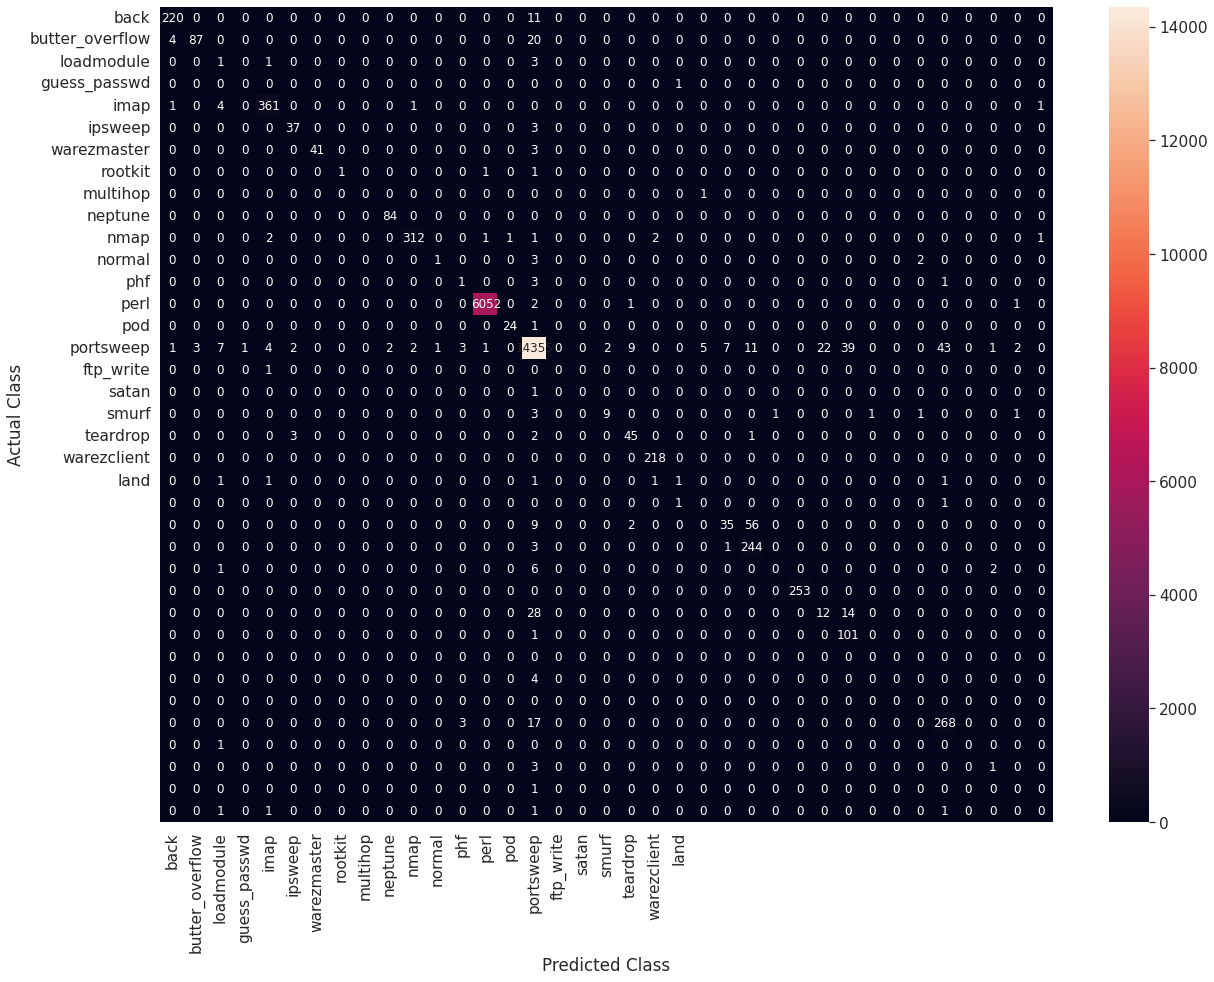

Precision score is:
0.9822549190057978
Recall score is:
0.9817146800069001
F1-score is:
0.9810997176932058


In [ ]:
svm_grid_results_tr, svm_grid_results_test = model(svm_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [ ]:
print_grid_search_attributes(svm_grid)

---------------------------
|      Best Estimator     |
---------------------------

	SGDClassifier(alpha=1e-06, penalty='l1')

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'alpha': 1e-06, 'penalty': 'l1'}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 5

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9790584611526743



In [ ]:
svm_gs = svm_grid.best_estimator_
y_tr_pred = svm_gs.predict(X_train_1.toarray())
y_test_pred = svm_gs.predict(X_test_1.toarray())
svm_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
svm_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
svm_grid_results_tr

{'f1_score': 0.9813952682335519,
 'precision': 0.9830327117705012,
 'recall': 0.9821636508141878}

In [ ]:
svm_tpr_fpr_train

{'fp': 274, 'fpr': 0.01322840728045189, 'tp': 32989, 'tpr': 0.9879904162923031}

In [ ]:
svm_grid_results_test

{'f1_score': 0.9810997176932058,
 'model': <function __main__.model>,
 'precision': 0.9822549190057978,
 'recall': 0.9817146800069001}

In [ ]:
svm_tpr_fpr_test

{'fp': 131,
 'fpr': 0.015118291979226775,
 'tp': 14355,
 'tpr': 0.9884321421193968}